Data Cleansing

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [2]:
macroecon = pd.read_csv("master_macroeconomics.csv")

Dropping all unncessary, irrelevant, and duplicate columns:

In [4]:
to_drop = ['Japanese Yen to U.S. Dollar Spot Exchange Rate', 'Japanese Yen to U.S. Dollar Spot Exchange Rate (Growth)']
macroecon.drop(to_drop, inplace=True, axis=1)

In [14]:
to_drop2 = ['CBOE Volatility Index: VIX', 'Gross Domestic Product (Growth)', 'Gross National Product (Growth)', 'Gross domestic product per capita (Growth)', 'Sticky Price Consumer Price Index less Food and Energy (Growth)', 'Producer Price Index by Commodity: All Commodities (Growth)', 'Unemployment Rate (Growth)', 'Labor Force Participation Rate (Growth)', 'Personal Consumption Expenditures (Growth)', 'Net domestic investment: Private: Domestic business (Growth)', 'Federal Government: Current Expenditures (Growth)', 'Trade Balance: Goods and Services, Balance of Payments Basis (Growth)', 'Balance on current account (Growth)', 'U.S. Dollars to Euro Spot Exchange Rate (Growth)', 'Federal Funds Effective Rate (Growth)', 'M1 (Growth)', 'M2 (Growth)', 'Federal Debt: Total Public Debt (Growth)', 'Federal Surplus or Deficit [-] (Growth)', 'Advance Retail Sales: Retail Trade (Growth)', 'Industrial Production: Total Index (Growth)', 'New Privately-Owned Housing Units Started: Total Units (Growth)', 'Total Construction Spending: Total Construction in the United States (Growth)', 'Consumer Opinion Surveys: Confidence Indicators: Composite Indicators: OECD Indicator for United States (Growth)', 'Business Tendency Surveys (Manufacturing): Confidence Indicators: Composite Indicators: OECD Indicator for United States (Growth)', 'Leading Index for the United States (Growth)', 'Retail Inventories: Clothing and Clothing Accessory Stores', 'Total Business Inventories (Growth)', '5-Year High Quality Market (HQM) Corporate Bond Par Yield (Growth)', 'Corporate Profits After Tax (without IVA and CCAdj) (Growth)', 'Real Exports of Goods and Services (Growth)', 'Rest of the World; Foreign Direct Investment in U.S.; Asset (Current Cost), Transactions (Growth)', 'Equity Market Volatility Tracker: Exchange Rates (Growth)', 'Producer Price Index by Commodity: Metals and Metal Products: Gold Ores (Growth)', '15-Year Fixed Rate Mortgage Average in the United States (Growth)', 'Disposable Personal Income (Growth)', 'CBOE Volatility Index: VIX (Growth)', 'ICE BofA US High Yield Index Effective Yield (Growth)', 'Employment Cost Index: Total compensation: All Civilian (Growth)', 'Federal Debt: Total Public Debt as Percent of Gross Domestic Product (Growth)', 'Personal Saving (Growth)']
macroecon.drop(to_drop2, inplace=True, axis=1)

In [17]:
to_drop3 = ['Gross National Product', 'Gross domestic product per capita', 'Sticky Price Consumer Price Index less Food and Energy', 'Trade Balance: Goods and Services, Balance of Payments Basis', 'M1', 'Equity Market Volatility Tracker: Exchange Rates', 'Producer Price Index by Commodity: Metals and Metal Products: Gold Ores', 'Federal Debt: Total Public Debt as Percent of Gross Domestic Product']
macroecon.drop(to_drop3, inplace=True, axis=1)

In [21]:
to_drop4 = ['Retail Inventories: Clothing and Clothing Accessory Stores.1', 'Leading Index for the United States', 'Real Exports of Goods and Services', 'ICE BofA US High Yield Index Effective Yield']
macroecon.drop(to_drop4, inplace=True, axis=1)

Insights

In [5]:
macroecon.set_index('date', inplace=True)

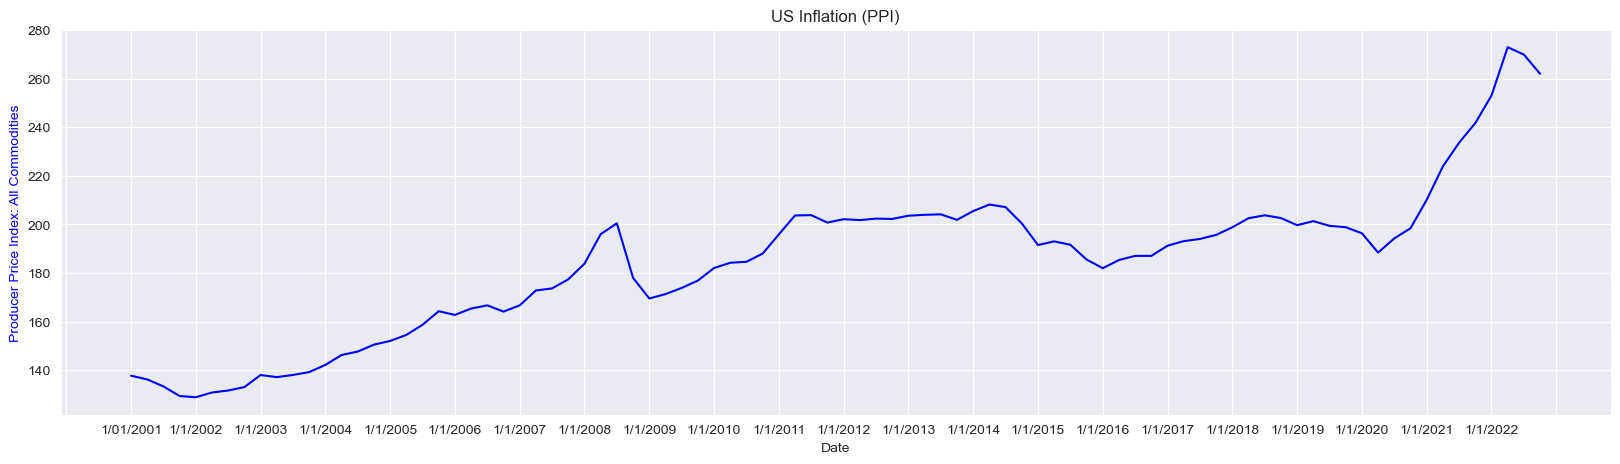

In [6]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots()
ax.plot(macroecon.index, macroecon['Producer Price Index by Commodity: All Commodities'], color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Producer Price Index: All Commodities', color='blue')
ax.xaxis.set_major_locator(ticker.MultipleLocator(4)) 
ax.set(title='US Inflation (PPI)')
plt.show()

PPI is clearly rising over the years. According to the Bureau of Labor Statistics, PPI measures "the average change over time in the selling prices received by domestic producers for their output." Thus PPI is a measure of inflation from the supply side.

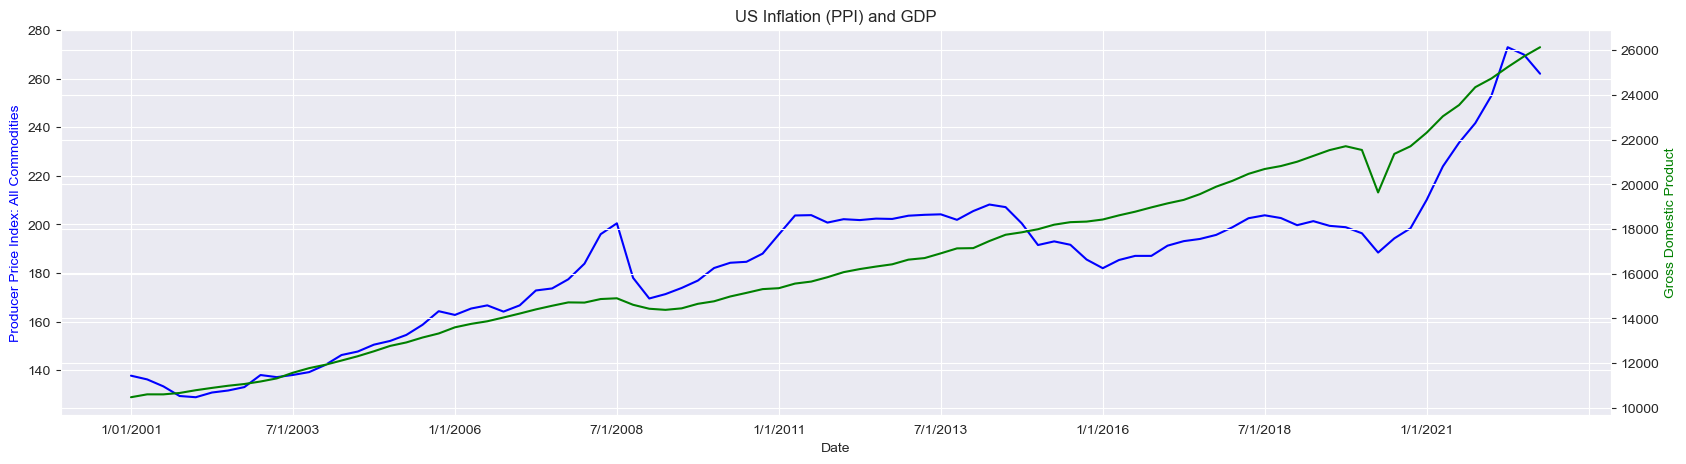

In [7]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots()
PPI = ax.plot(macroecon.index, macroecon['Producer Price Index by Commodity: All Commodities'], color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Producer Price Index: All Commodities', color='blue')
ax.xaxis.set_major_locator(ticker.MultipleLocator(4)) 
ax2 = ax.twinx()
GDP = ax2.plot(macroecon.index, macroecon['Gross Domestic Product'], color='green')
ax2.set_ylabel('Gross Domestic Product', color='green')
ax2.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set(title='US Inflation (PPI) and GDP')
plt.show()

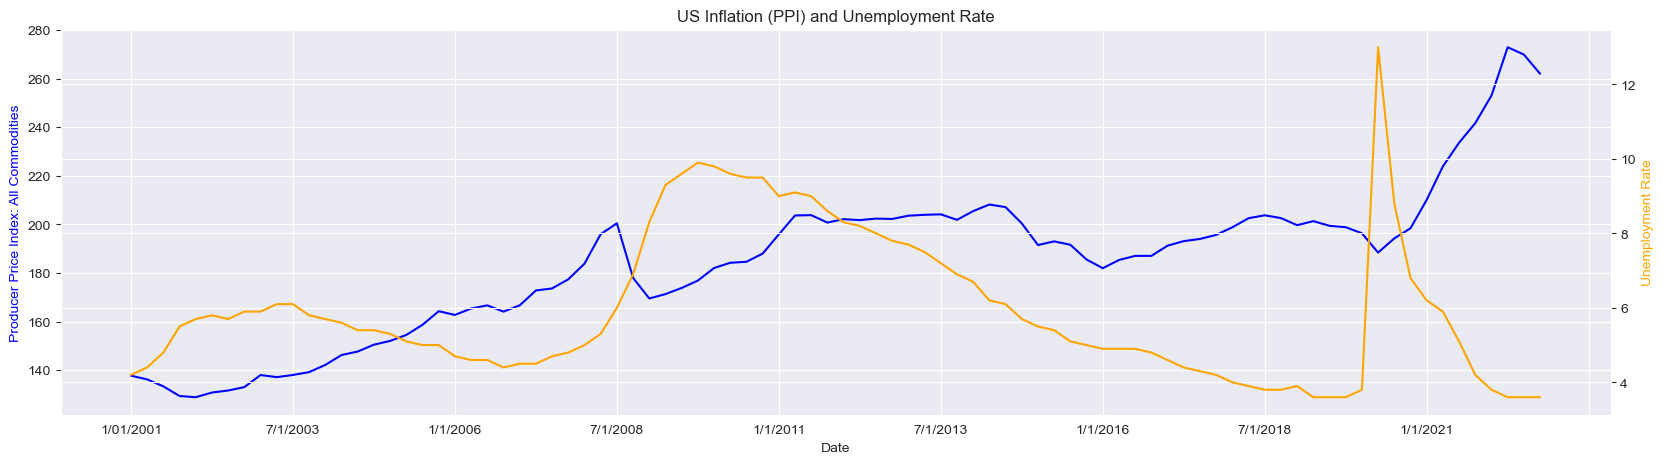

In [65]:
fig, ax = plt.subplots()
PPI = ax.plot(macroecon.index, macroecon['Producer Price Index by Commodity: All Commodities'], color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Producer Price Index: All Commodities', color='blue')
ax.xaxis.set_major_locator(ticker.MultipleLocator(4)) 
ax2 = ax.twinx()
GDP = ax2.plot(macroecon.index, macroecon['Unemployment Rate'], color='orange')
ax2.set_ylabel('Unemployment Rate', color='orange')
ax2.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set(title='US Inflation (PPI) and Unemployment Rate')
plt.show()

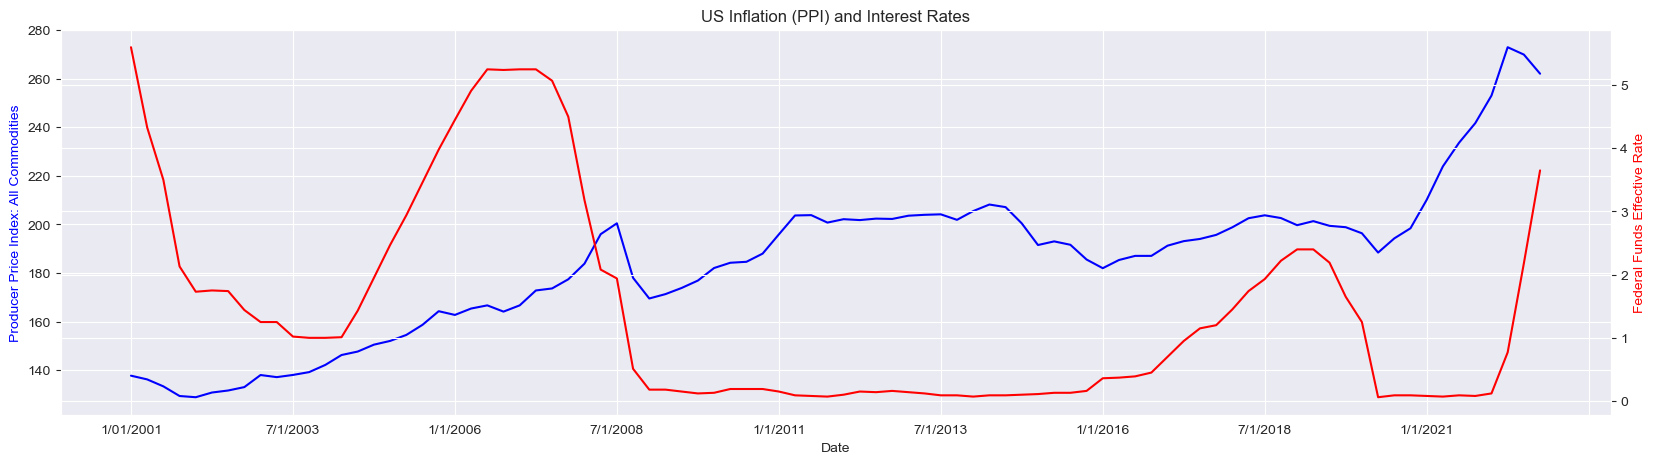

In [28]:
fig, ax = plt.subplots()
PPI = ax.plot(macroecon.index, macroecon['Producer Price Index by Commodity: All Commodities'], color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Producer Price Index: All Commodities', color='blue')
ax.xaxis.set_major_locator(ticker.MultipleLocator(4)) 
ax2 = ax.twinx()
GDP = ax2.plot(macroecon.index, macroecon['Federal Funds Effective Rate'], color='red')
ax2.set_ylabel('Federal Funds Effective Rate', color='red')
ax2.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set(title='US Inflation (PPI) and Interest Rates')
plt.show()

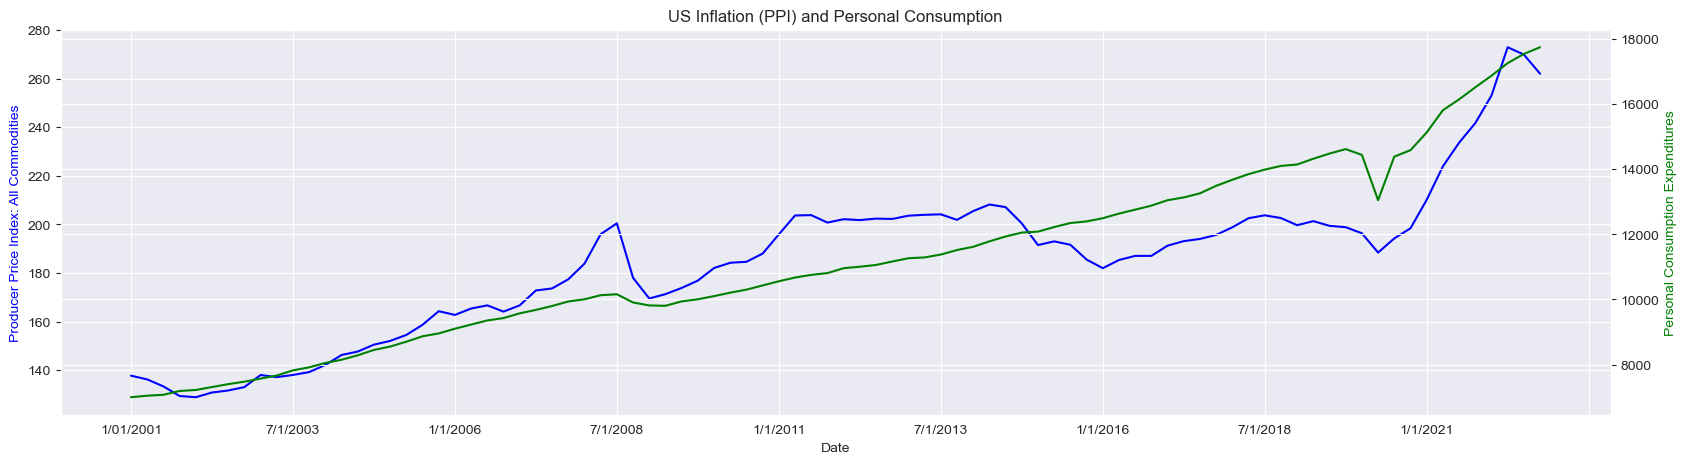

In [23]:
fig, ax = plt.subplots()
PPI = ax.plot(macroecon.index, macroecon['Producer Price Index by Commodity: All Commodities'], color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Producer Price Index: All Commodities', color='blue')
ax.xaxis.set_major_locator(ticker.MultipleLocator(4)) 
ax2 = ax.twinx()
GDP = ax2.plot(macroecon.index, macroecon['Personal Consumption Expenditures'], color='green')
ax2.set_ylabel('Personal Consumption Expenditures', color='green')
ax2.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set(title='US Inflation (PPI) and Personal Consumption')
plt.show()

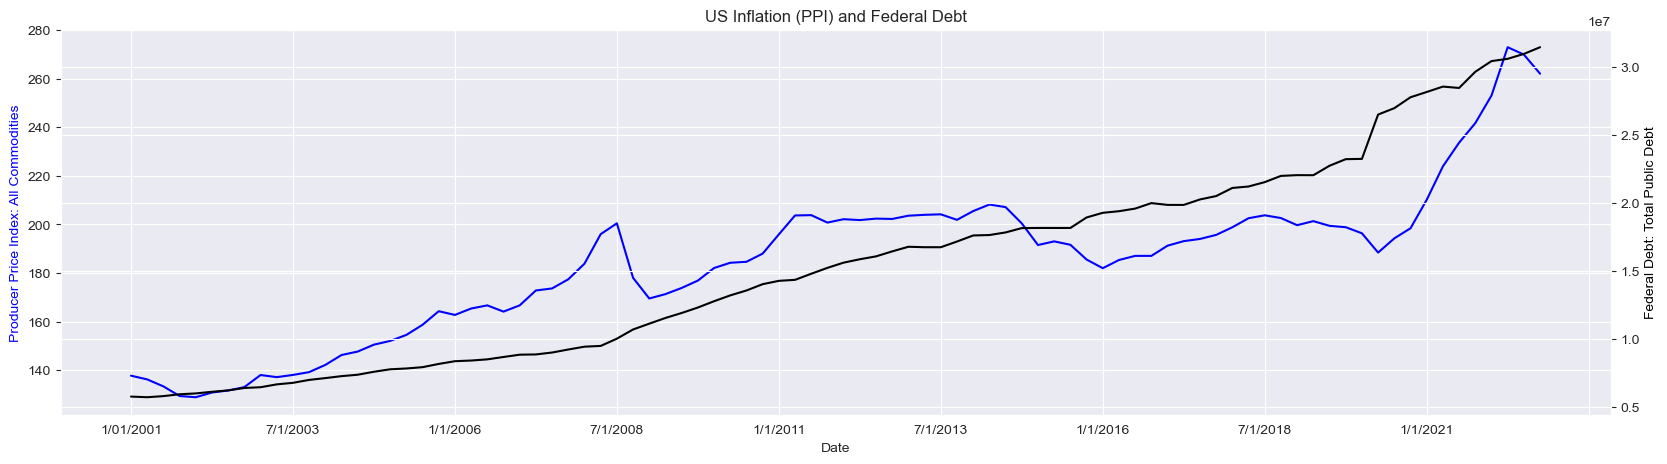

In [25]:
fig, ax = plt.subplots()
PPI = ax.plot(macroecon.index, macroecon['Producer Price Index by Commodity: All Commodities'], color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Producer Price Index: All Commodities', color='blue')
ax.xaxis.set_major_locator(ticker.MultipleLocator(4)) 
ax2 = ax.twinx()
GDP = ax2.plot(macroecon.index, macroecon['Federal Debt: Total Public Debt'], color='black')
ax2.set_ylabel('Federal Debt: Total Public Debt', color='black')
ax2.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set(title='US Inflation (PPI) and Federal Debt')
plt.show()

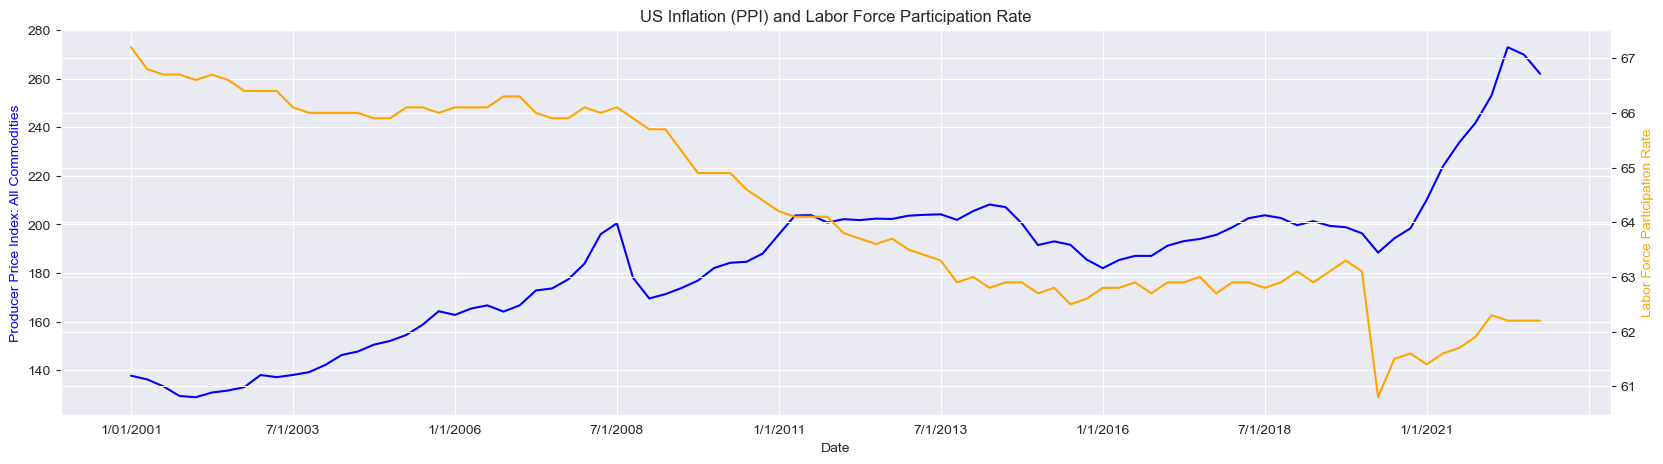

In [26]:
fig, ax = plt.subplots()
PPI = ax.plot(macroecon.index, macroecon['Producer Price Index by Commodity: All Commodities'], color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Producer Price Index: All Commodities', color='blue')
ax.xaxis.set_major_locator(ticker.MultipleLocator(4)) 
ax2 = ax.twinx()
GDP = ax2.plot(macroecon.index, macroecon['Labor Force Participation Rate'], color='orange')
ax2.set_ylabel('Labor Force Participation Rate', color='orange')
ax2.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set(title='US Inflation (PPI) and Labor Force Participation Rate')
plt.show()

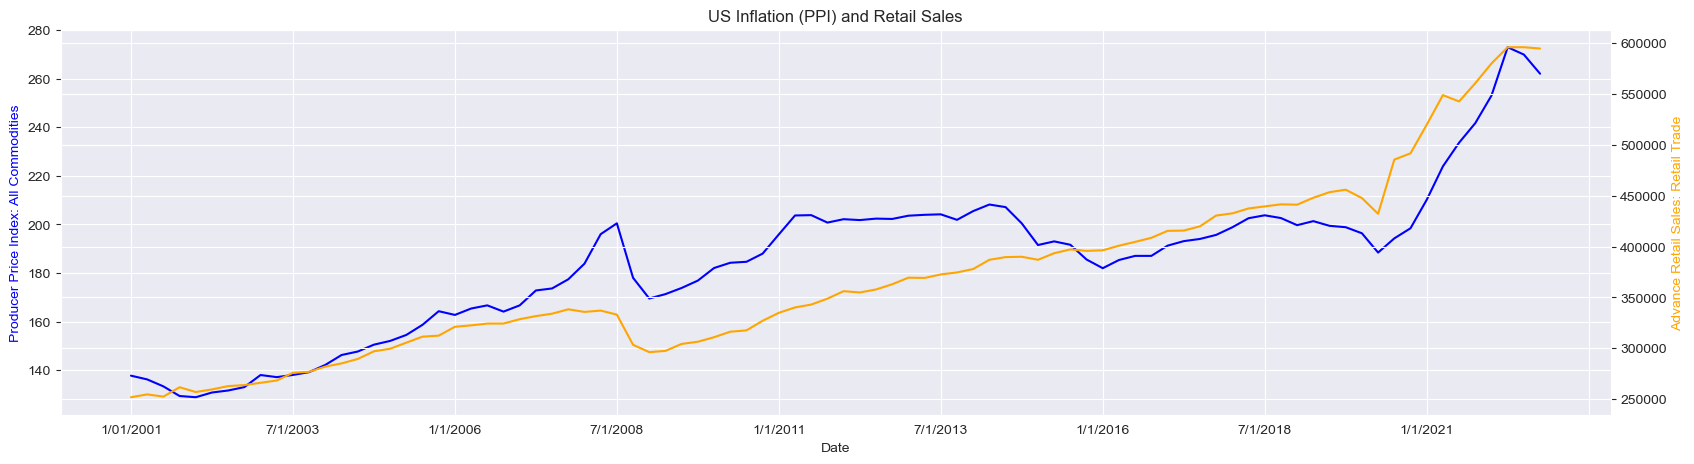

In [27]:
fig, ax = plt.subplots()
PPI = ax.plot(macroecon.index, macroecon['Producer Price Index by Commodity: All Commodities'], color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Producer Price Index: All Commodities', color='blue')
ax.xaxis.set_major_locator(ticker.MultipleLocator(4)) 
ax2 = ax.twinx()
GDP = ax2.plot(macroecon.index, macroecon['Advance Retail Sales: Retail Trade'], color='orange')
ax2.set_ylabel('Advance Retail Sales: Retail Trade', color='orange')
ax2.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set(title='US Inflation (PPI) and Retail Sales')
plt.show()

It seems like inflation is positively correlated with retail sales, personal consumption, and the federal debt and not so much by monetary policy measurements such as the federal funds rate or the unemployment rate. This is somewhat as traditionally economists think of inflation and unemployment as inversely correlated. But the data shows that inflation since 2000 has been unaffected by changes in the unemployment rate.

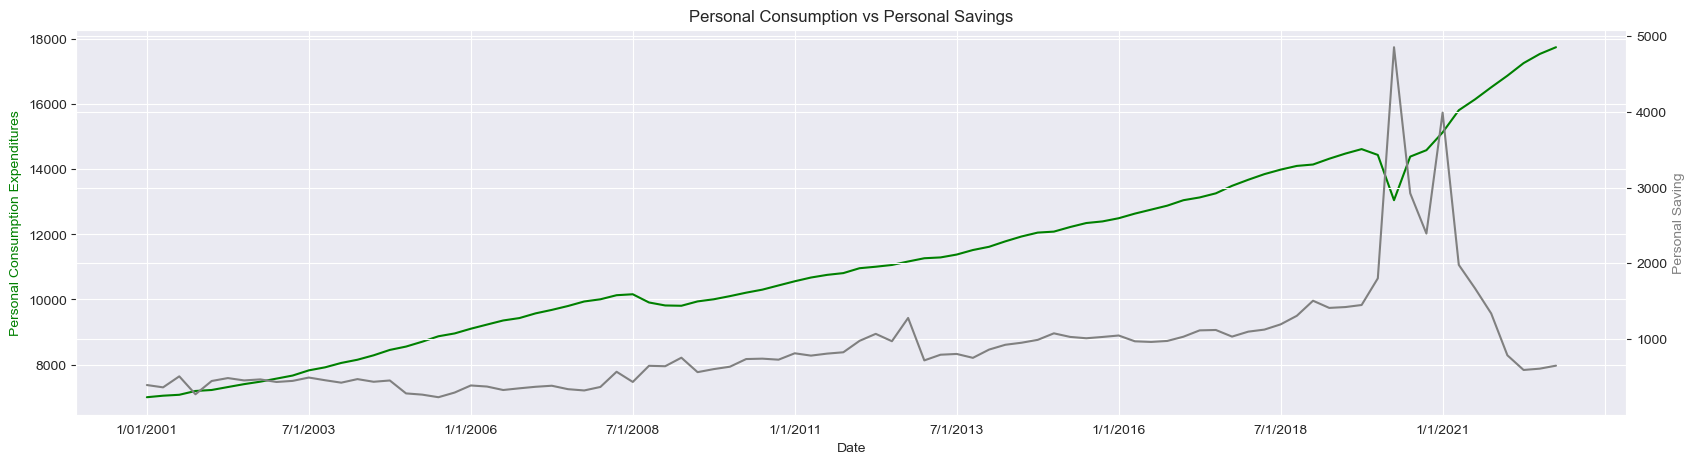

In [30]:
fig, ax = plt.subplots()
PPI = ax.plot(macroecon.index, macroecon['Personal Consumption Expenditures'], color='green')
ax.set_xlabel('Date')
ax.set_ylabel('Personal Consumption Expenditures', color='green')
ax.xaxis.set_major_locator(ticker.MultipleLocator(4)) 
ax2 = ax.twinx()
GDP = ax2.plot(macroecon.index, macroecon['Personal Saving'], color='grey')
ax2.set_ylabel('Personal Saving', color='grey')
ax2.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set(title='Personal Consumption vs Personal Savings')
plt.show()

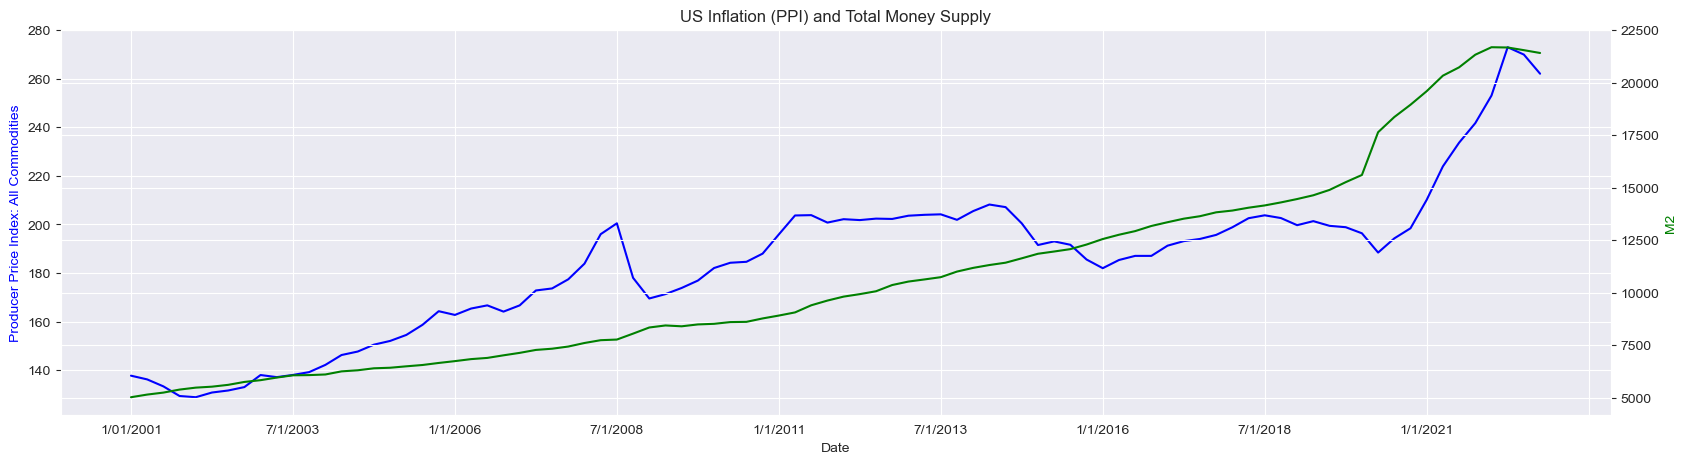

In [31]:
fig, ax = plt.subplots()
PPI = ax.plot(macroecon.index, macroecon['Producer Price Index by Commodity: All Commodities'], color='blue')
ax.set_xlabel('Date')
ax.set_ylabel('Producer Price Index: All Commodities', color='blue')
ax.xaxis.set_major_locator(ticker.MultipleLocator(4)) 
ax2 = ax.twinx()
GDP = ax2.plot(macroecon.index, macroecon['M2'], color='green')
ax2.set_ylabel('M2', color='green')
ax2.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set(title='US Inflation (PPI) and Total Money Supply')
plt.show()

Personal consumption has also increased far higher than personal savings. One conclusion we can draw is that Americans are spending more money than they are saving, which also drives up inflation.

Secondly, M2 or the total money supply, has also risen sharply, which also correlates to inflation.

<Axes: >

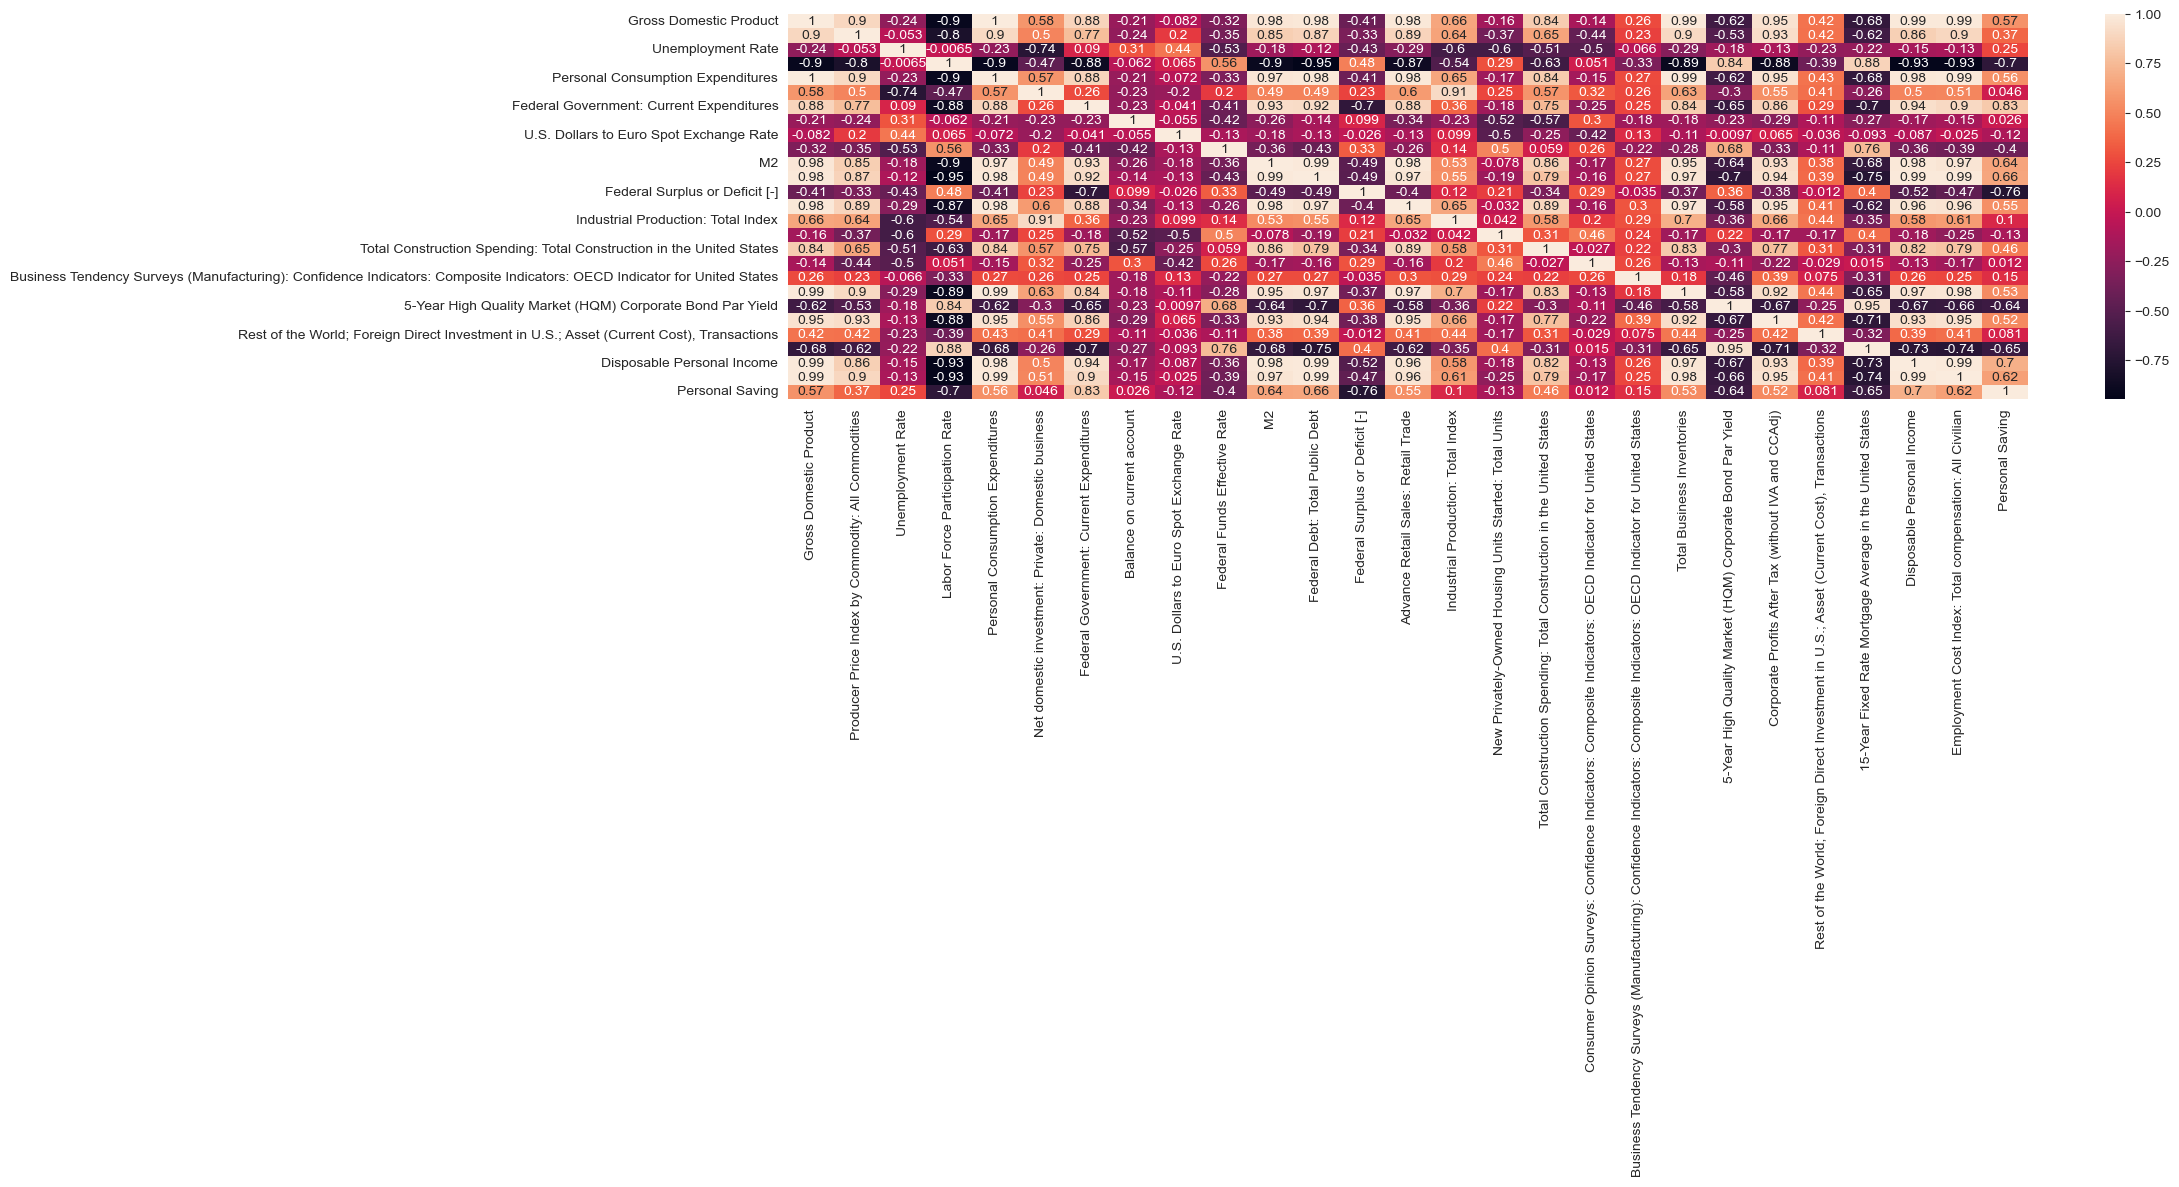

In [22]:
macroecon.corr(method='pearson')
sns.heatmap(macroecon.corr(method='pearson'), annot=True)

<Axes: >

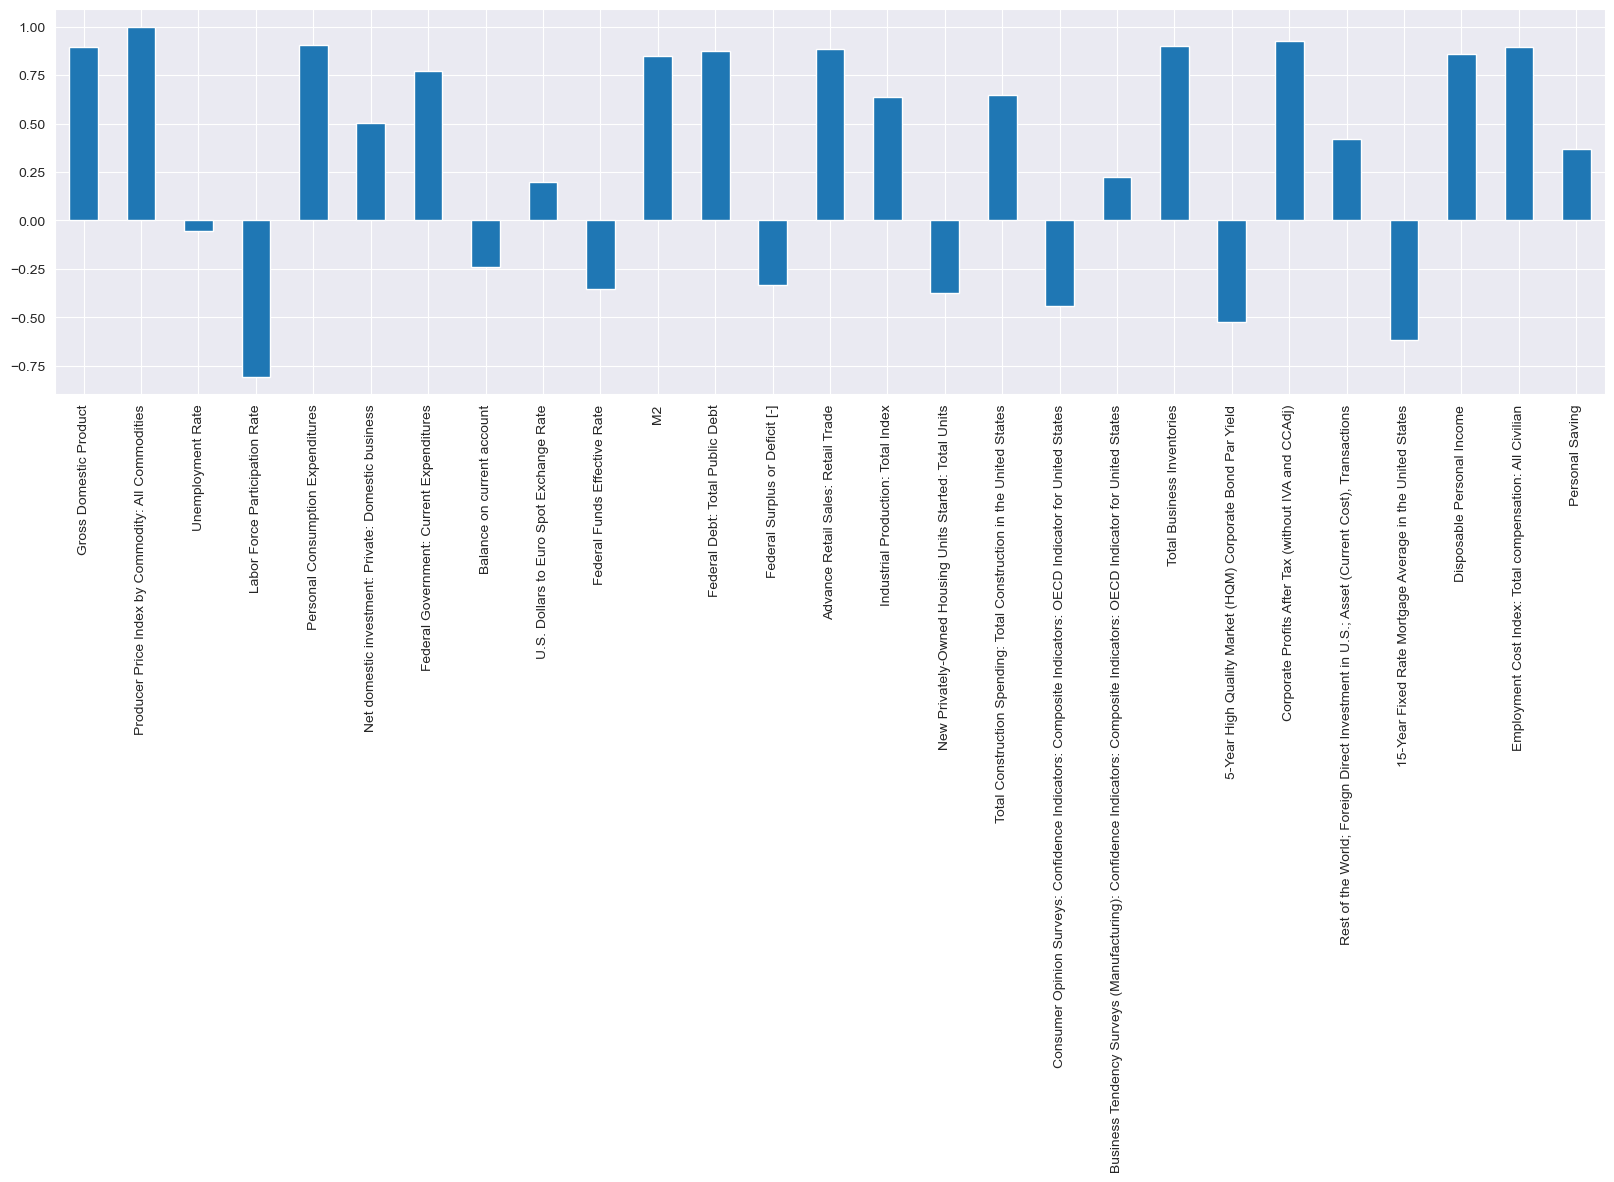

In [32]:
macroecon.corr()['Producer Price Index by Commodity: All Commodities'].plot(kind="bar")

In [36]:
dependent_variable = macroecon['Producer Price Index by Commodity: All Commodities']
independent_variable = macroecon[['Gross Domestic Product', 'Personal Consumption Expenditures', 'Labor Force Participation Rate', 'Federal Government: Current Expenditures', 'M2', 'Federal Debt: Total Public Debt', 'Advance Retail Sales: Retail Trade', 'Total Business Inventories', 'Corporate Profits After Tax (without IVA and CCAdj)', 'Disposable Personal Income', 'Employment Cost Index: Total compensation: All Civilian']]
independent_variable = sm.add_constant(independent_variable)
regression_model = sm.OLS(dependent_variable, independent_variable).fit()
print(regression_model.summary())

                                            OLS Regression Results                                            
Dep. Variable:     Producer Price Index by Commodity: All Commodities   R-squared:                       0.965
Model:                                                            OLS   Adj. R-squared:                  0.960
Method:                                                 Least Squares   F-statistic:                     192.9
Date:                                                Wed, 13 Dec 2023   Prob (F-statistic):           8.63e-51
Time:                                                        14:34:17   Log-Likelihood:                -279.06
No. Observations:                                                  88   AIC:                             582.1
Df Residuals:                                                      76   BIC:                             611.8
Df Model:                                                          11                                         
C